<blockquote>
    <h1>Exercise 7.6</h1>
    <p>In this exercise, you will further analyze the <code>Wage</code> data set considered throughout this chapter.</p>
    <ol>
        <li>Perform polynomial regression to predict $\mathrm{wage}$ using $\mathrm{age}$. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data.</li>
        <li>Fit a step function to predict $\mathrm{wage}$ using $\mathrm{age}$, and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut

<h3>Exercise 7.6.1</h3>
<blockquote>
    <i>Perform polynomial regression to predict $\mathrm{wage}$ using $\mathrm{age}$. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data.</i>
</blockquote>

In [2]:
df = pd.read_csv("../../DataSets/Wage/Wage.csv")
df = df[['age', 'wage']]
df.head()

,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154


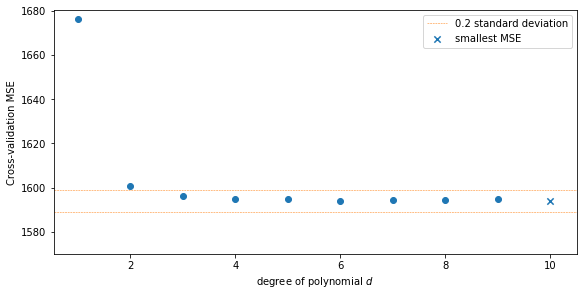

In [3]:
polynomialRegressionChooseOptimalDegree(df[['age']], df[['wage']], total_degrees=10)

<p>Although the polynomial of degree $10$ gives the smallest test MSE, we choose $d=3$ as the optimal degree because its associated test MSE is almost the same as for $d=10$ while it is a much simpler model.<p>

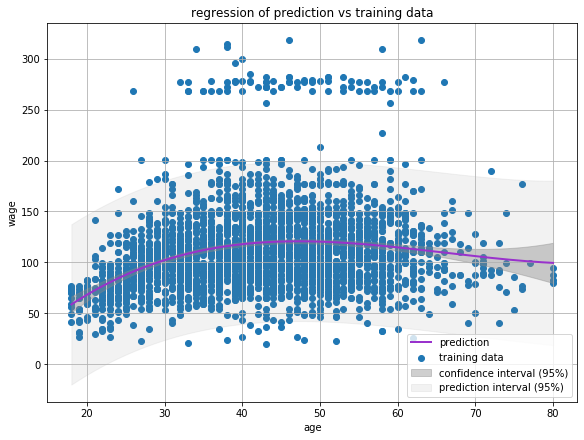

In [4]:
df_x_withIntercept = df[['age']].copy()
for i in range(2, 4):
    variable_name = 'age^' + str(i)
    df_x_withIntercept[variable_name] = df_x_withIntercept['age']**i

df_x_withIntercept.insert(0, 'Intercept', 1)
fitted = sm.OLS(df[['wage']], df_x_withIntercept).fit()

polynomialMap = {
    'age': 1,
    'age^2': 2,
    'age^3': 3,
}
createPolynomialLinearRegressionPlot(df_x_withIntercept, df[['wage']], fitted_model=fitted, height=6, width=8, polynomialMap=polynomialMap)

In [5]:
# ANOVA
df_x_withIntercept = df[['age']]
for i in range(2, 11):
    variable_name = 'age^' + str(i)
    df_x_withIntercept[variable_name] = df_x_withIntercept['age']**i
# df_x_withIntercept = df_x.copy()
df_x_withIntercept.insert(0, 'Intercept', 1)
models = {}
descriptiveColumns = ['Intercept']
columns = df_x_withIntercept.columns.tolist()
for column in columns:
    descriptiveColumns += [column]
    fitted = sm.OLS(df[['wage']], df_x_withIntercept[descriptiveColumns]).fit()
    models[column] = fitted

df_anova = sm.stats.anova_lm(*models.values())
df_anova.rename(columns={'df_resid': 'dof of residuals', 'ssr': 'RSS', 
                         'df_diff': 'dof difference',
                         'ss_dff': 'RSS difference', 
                         'F': 'F-statistic'}, inplace=True)
df_anova

/home/floris/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/floris/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/floris/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,dof of residuals,RSS,dof difference,ss_diff,F-statistic,Pr(>F)
0,2998.0,5.222423e+06,0.0,NaN,NaN,NaN
1,2998.0,5.022216e+06,-0.0,200207.253729,-inf,NaN
2,2997.0,4.793430e+06,1.0,228786.010128,143.234619,2.808150e-32
3,2996.0,4.777674e+06,1.0,15755.693664,9.864068,1.701809e-03
4,2995.0,4.771604e+06,1.0,6070.152124,3.800302,5.133656e-02
5,2994.0,4.770322e+06,1.0,1282.563017,0.802966,3.702801e-01
6,2993.0,4.766389e+06,1.0,3932.250072,2.461839,1.167478e-01
7,2993.0,4.764604e+06,-0.0,1785.874398,-inf,NaN
8,2993.0,4.764137e+06,-0.0,467.058408,-inf,NaN
9,2993.0,4.764981e+06,-0.0,-844.163760,inf,NaN


<p>The $p$ values of the ANOVA summary show that any model with $d > 4$ is statistically insignificant with a significance level of $\alpha = 10 \%$.</p>

<h3>Exercise 7.6.2</h3>
<blockquote>
    <i>Fit a step function to predict $\mathrm{wage}$ using $\mathrm{age}$, and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.</i>
</blockquote>

/home/floris/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


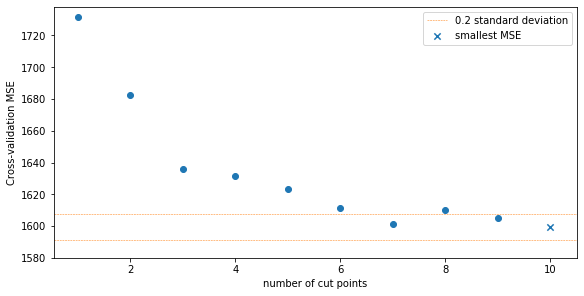

In [6]:
stepFunctionChooseOptimalCuts(df[['age']], df[['wage']], total_cuts=10)

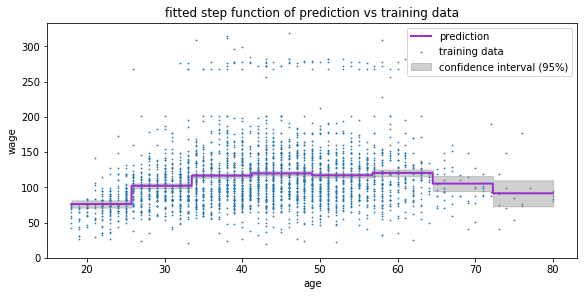

In [7]:
plotFittedStepFunction(df[['age']], df[['wage']], cuts=7)